In [12]:
df <- read.csv("penguins.csv")

print(head(df))

  species    island bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1  Adelie Torgersen           39.1          18.7               181        3750
2  Adelie Torgersen           39.5          17.4               186        3800
3  Adelie Torgersen           40.3          18.0               195        3250
4  Adelie Torgersen             NA            NA                NA          NA
5  Adelie Torgersen           36.7          19.3               193        3450
6  Adelie Torgersen           39.3          20.6               190        3650
     sex year
1   male 2007
2 female 2007
3 female 2007
4   <NA> 2007
5 female 2007
6   male 2007


In [17]:
df <- na.omit(df)
#df <- df[, c(setdiff(names(df), c("island", "sex", "species")), "island", "sex", "species")]
print(head(df))

  species    island bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1  Adelie Torgersen           39.1          18.7               181        3750
2  Adelie Torgersen           39.5          17.4               186        3800
3  Adelie Torgersen           40.3          18.0               195        3250
5  Adelie Torgersen           36.7          19.3               193        3450
6  Adelie Torgersen           39.3          20.6               190        3650
7  Adelie Torgersen           38.9          17.8               181        3625
     sex year
1   male 2007
2 female 2007
3 female 2007
5 female 2007
6   male 2007
7 female 2007


In [18]:
# Assuming your data frame is named 'df'
unique_species <- unique(df$species)
unique_sex <- unique(df$sex)
unique_island <- unique(df$island)

# Print the unique values
print(unique_species)
print(unique_sex)
print(unique_island)


[1] "Adelie"    "Gentoo"    "Chinstrap"
[1] "male"   "female"
[1] "Torgersen" "Biscoe"    "Dream"    


In [23]:

# Convert unique values to numeric variables (assuming you want to assign numeric codes to each unique value)
species_numeric <- as.numeric(factor(unique_species))
sex_numeric <- as.numeric(factor(unique_sex))
island_numeric <- as.numeric(factor(unique_island))

# Create data frames or named vectors for species, sex, and island
species_data <- data.frame(species = unique_species, numeric = as.numeric(factor(unique_species)))
sex_data <- data.frame(sex = unique_sex, numeric = as.numeric(factor(unique_sex)))
island_data <- data.frame(island = unique_island, numeric = as.numeric(factor(unique_island)))

# Print the data frames or named vectors
print(species_data)
print(sex_data)
print(island_data)


    species numeric
1    Adelie       1
2    Gentoo       3
3 Chinstrap       2
     sex numeric
1   male       2
2 female       1
     island numeric
1 Torgersen       3
2    Biscoe       1
3     Dream       2


In [25]:
# Convert species, sex, and island columns to factors
df$species <- factor(df$species, levels = unique_species)
df$sex <- factor(df$sex, levels = unique_sex)
df$island <- factor(df$island, levels = unique_island)

# Convert factors to numeric
df$species_numeric <- as.numeric(df$species)
df$sex_numeric <- as.numeric(df$sex)
df$island_numeric <- as.numeric(df$island)

# Print the updated dataset
print(head(df))


  species    island bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1  Adelie Torgersen           39.1          18.7               181        3750
2  Adelie Torgersen           39.5          17.4               186        3800
3  Adelie Torgersen           40.3          18.0               195        3250
5  Adelie Torgersen           36.7          19.3               193        3450
6  Adelie Torgersen           39.3          20.6               190        3650
7  Adelie Torgersen           38.9          17.8               181        3625
     sex year species_numeric sex_numeric island_numeric
1   male 2007               1           1              1
2 female 2007               1           2              1
3 female 2007               1           2              1
5 female 2007               1           2              1
6   male 2007               1           1              1
7 female 2007               1           2              1


In [26]:
df <- df[, !(names(df) %in% c("species", "island", "sex"))]
print(head(df))


  bill_length_mm bill_depth_mm flipper_length_mm body_mass_g year
1           39.1          18.7               181        3750 2007
2           39.5          17.4               186        3800 2007
3           40.3          18.0               195        3250 2007
5           36.7          19.3               193        3450 2007
6           39.3          20.6               190        3650 2007
7           38.9          17.8               181        3625 2007
  species_numeric sex_numeric island_numeric
1               1           1              1
2               1           2              1
3               1           2              1
5               1           2              1
6               1           1              1
7               1           2              1


In [29]:
mlr_penguins <- lm(species_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g + year, data = df)
summary(mlr_penguins)



Call:
lm(formula = species_numeric ~ bill_length_mm + bill_depth_mm + 
    flipper_length_mm + body_mass_g + year, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24153 -0.26636 -0.00304  0.22533  1.18050 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.332e+02  5.646e+01   2.359   0.0189 *  
bill_length_mm     1.421e-01  5.480e-03  25.925  < 2e-16 ***
bill_depth_mm     -6.117e-02  1.414e-02  -4.327 2.01e-05 ***
flipper_length_mm  3.539e-03  3.981e-03   0.889   0.3747    
body_mass_g       -5.016e-04  5.756e-05  -8.715  < 2e-16 ***
year              -6.733e-02  2.820e-02  -2.387   0.0175 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3992 on 327 degrees of freedom
Multiple R-squared:  0.7338,	Adjusted R-squared:  0.7297 
F-statistic: 180.3 on 5 and 327 DF,  p-value: < 2.2e-16


In [30]:
penguins_anova = anova(mlr_penguins)
penguins_anova


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
bill_length_mm,1,1.183116e+02,1.183116e+02,742.45617255,3.831856e-86
bill_depth_mm,1,3.240037e-03,3.240037e-03,0.02033262,8.866998e-01
flipper_length_mm,1,1.318029e+01,1.318029e+01,82.71196050,9.440986e-18
body_mass_g,1,1.121834e+01,1.121834e+01,70.39992213,1.475869e-15
year,1,9.082639e-01,9.082639e-01,5.69974619,1.753499e-02
Residuals,327,5.210799e+01,1.593516e-01,NA,NA


The ANOVA table provides information on the analysis of variance for the predictor variables with respect to the species of penguins. Here's a summary of the results:

- **bill_length_mm**: The p-value associated with bill_length_mm is extremely small (p < 0.001), indicating a significant difference in bill length across different species of penguins.
- **bill_depth_mm**: The p-value for bill_depth_mm is not significant (p > 0.05), suggesting that there is no significant difference in bill depth across species.
- **flipper_length_mm**: The p-value for flipper_length_mm is highly significant (p < 0.001), indicating a significant difference in flipper length across species.
- **body_mass_g**: The p-value for body_mass_g is highly significant (p < 0.001), suggesting a significant difference in body mass across species.
- **year**: The p-value for year is significant (p = 0.018), suggesting a significant difference in the year of observation across species.

Overall, these results indicate that bill length, flipper length, body mass, and year of observation have significant associations with the species of penguins, while bill depth does not show significant differences across species.

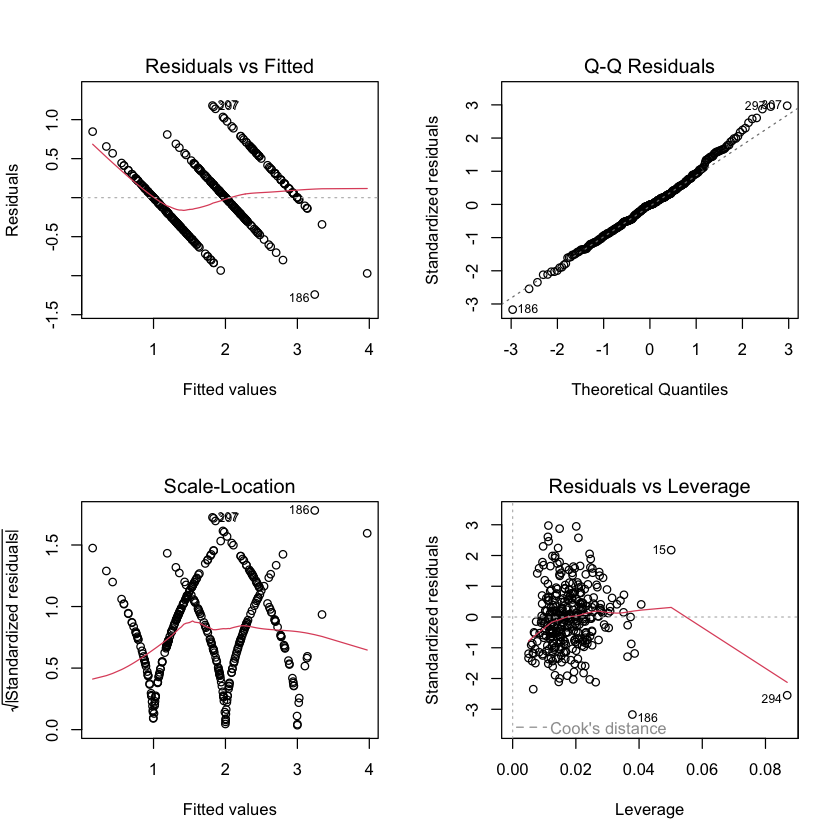

In [31]:
par(mfrow = c(2, 2))
plot(mlr_penguins)

Based on the diagnostic plots:

1. **Residuals vs Fitted:** There appears to be a non-linear pattern in the residuals, indicating that the relationship between the predictors and the target variable may not be adequately captured by the linear model. The red line in this plot suggests that the residuals are not evenly distributed around zero across all levels of fitted values.

2. **Q-Q Residuals:** The points in the Q-Q plot do not fall perfectly along the diagonal line, indicating departures from normality. Particularly, there are deviations at the tails of the distribution, suggesting that the residuals may not be normally distributed.

3. **Scale-Location:** The spread of residuals appears to be somewhat consistent across the range of fitted values, although there is some indication of heteroscedasticity, especially at the extremes of fitted values.

4. **Residuals vs Leverage:** There are several data points with high leverage (i.e., extreme values of predictors), and some of these points have relatively large standardized residuals. These points may have a disproportionate influence on the regression model.

Overall, the diagnostic plots suggest that the linear regression model may not be the most appropriate for the data, as it violates some of the assumptions of linear regression, such as linearity, normality of residuals, and constant variance.


Family: gaussian 
Link function: identity 

Formula:
species_numeric ~ s(bill_length_mm) + s(bill_depth_mm) + s(flipper_length_mm) + 
    s(body_mass_g)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.76577    0.01826    96.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                       edf Ref.df       F p-value    
s(bill_length_mm)    7.036  8.122 129.074  <2e-16 ***
s(bill_depth_mm)     5.466  6.635   1.780   0.088 .  
s(flipper_length_mm) 2.215  2.843   1.355   0.309    
s(body_mass_g)       4.397  5.493   9.117  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.812   Deviance explained = 82.3%
GCV = 0.11816  Scale est. = 0.11102   n = 333

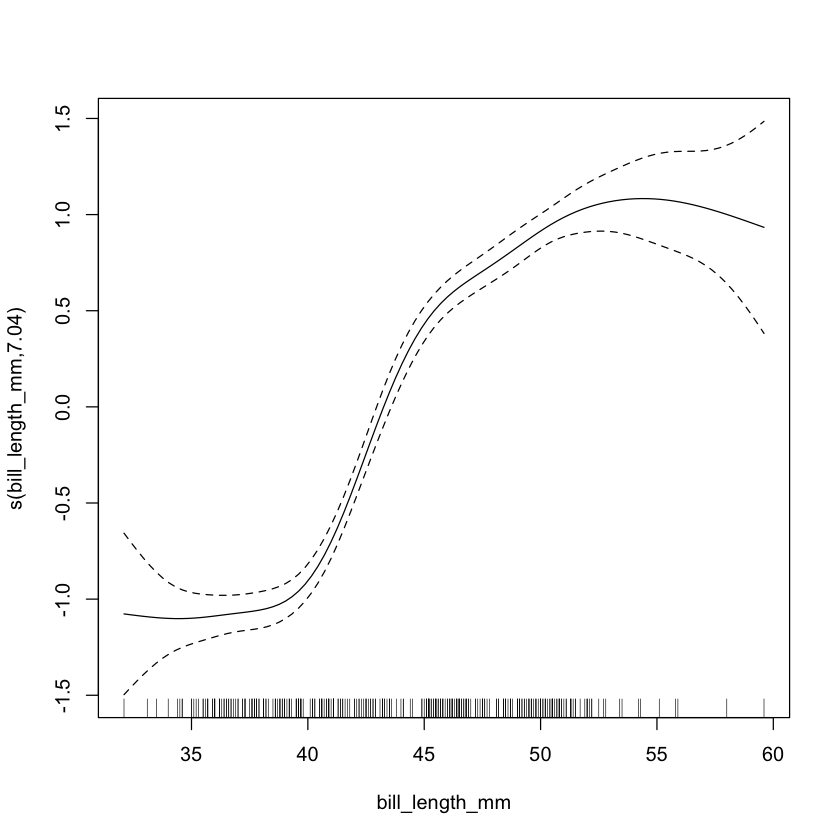

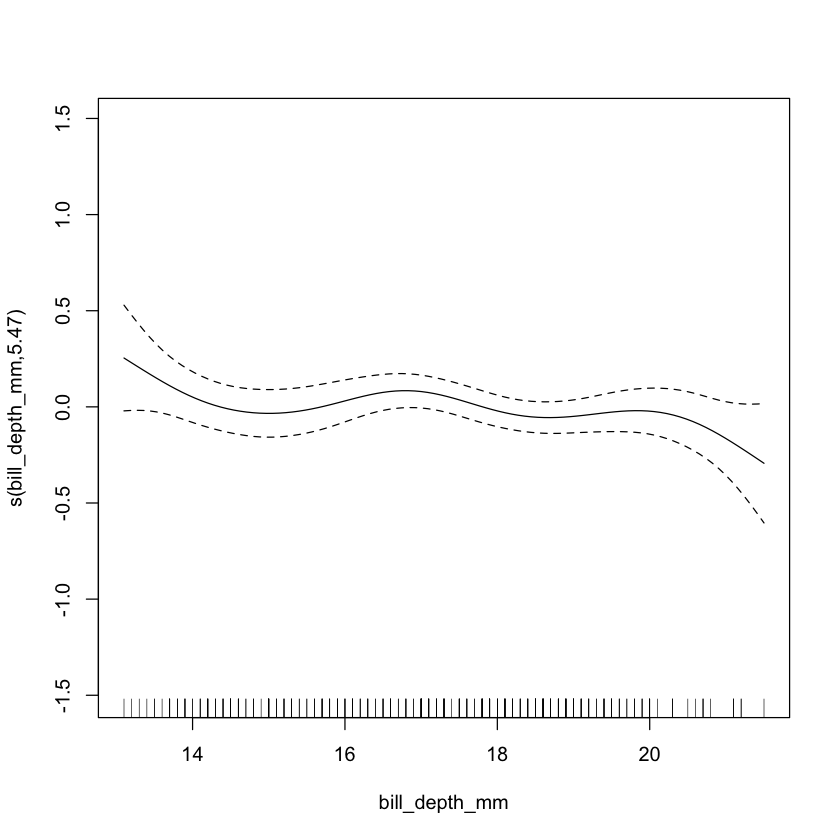

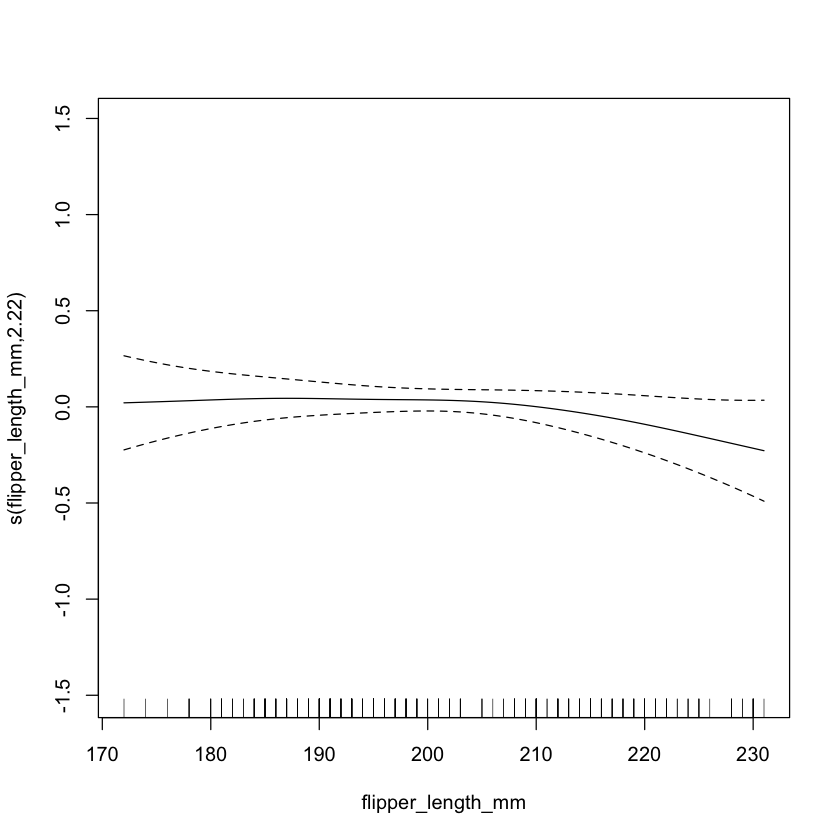

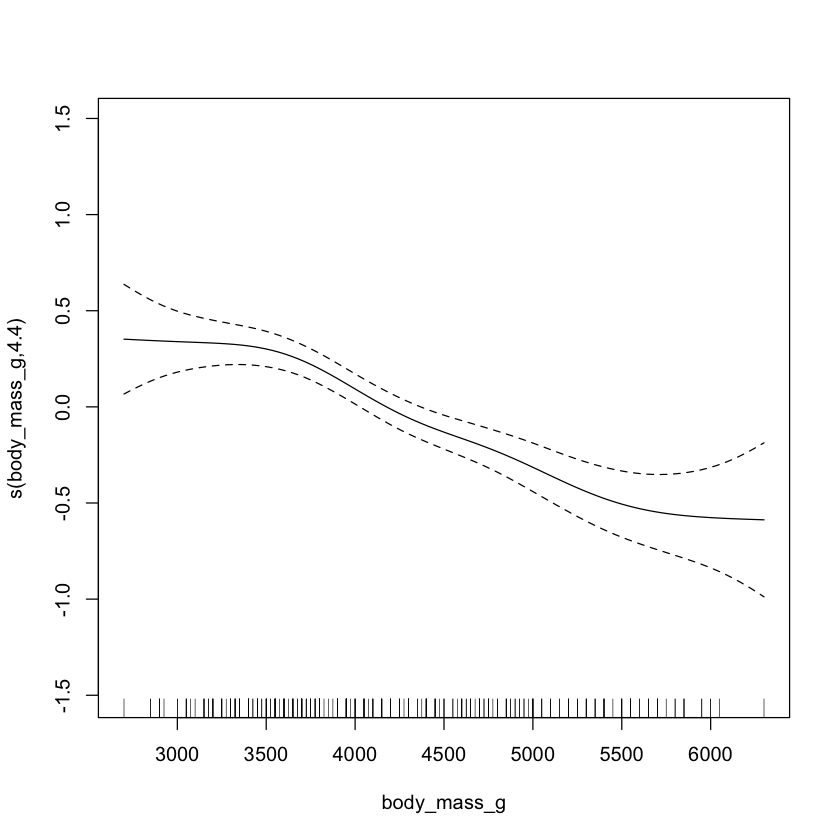

In [35]:
# Load the mgcv package
library(mgcv)

# Fit a GAM model
gam_model_penguins <- gam(species_numeric ~ s(bill_length_mm) + s(bill_depth_mm) + s(flipper_length_mm) + s(body_mass_g), data = df)


# Summary of the model
summary(gam_model_penguins)

# Diagnostic plots
plot(gam_model_penguins)

# Predictions
#new_data <- data.frame(predictor_variable1 = c(...), predictor_variable2 = c(...))
#predictions <- predict(gam_model, newdata = new_data)
